In [ ]:
import tensorflow as tf
from keras.datasets import imdb

In [ ]:
# in this code we use of 10000 words that most usable 

In [ ]:
(test_data,test_target),(train_data,train_target)=imdb.load_data(num_words=10000)

17464789/17464789 [==============================] - 0s 0us/step


In [ ]:
# in this code we show index of words

In [ ]:
index_word=imdb.get_word_index()

1641221/1641221 [==============================] - 0s 0us/step


In [ ]:
index_word

In [ ]:
index_word['pretty']

181

In [ ]:
#in this code we decode index_word to words due to we see complete client;s sentences 

In [ ]:
dic_words=dict([(value,key) for (key,value) in index_word.items()])

In [ ]:
dic_words[181]

'pretty'

In [ ]:
train_data[5]

In [ ]:
decode_sentence=' '.join([dic_words.get(i -3, '?')for i in train_data[5]])

In [ ]:
decode_sentence

"? i'm absolutely disgusted this movie isn't being sold all who love this movie should email disney and increase the demand for it they'd eventually have to sell it then i'd buy copies for everybody i know everything and everybody in this movie did a good job and i haven't figured out why disney hasn't put this movie on dvd or on vhs in rental stores at least i haven't seen any copies this is a wicked good movie and should be seen by all the kids in the new generation don't get to see it and i think they should it should at least be put back on the channel this movie doesn't deserve a cheap ? it deserves the real thing i'm them now this movie will be on dvd"

In [ ]:
train_target[5]

1

In [ ]:
import numpy as np

In [ ]:
#in this code we use one hote in to change data to tensor

In [ ]:
def creat_tensor(data,dim=10000):
  result=np.zeros((len(data),dim))
  for i, data in enumerate(data):
    # print(data)
    result[i,data]=1
  return result

In [ ]:
x_train=creat_tensor(train_data)
x_test=creat_tensor(test_data)

In [ ]:
print(type(x_test))

<class 'numpy.ndarray'>


In [ ]:
#Creat Model

In [ ]:
from keras import models,layers

In [ ]:
model=models.Sequential()

In [101]:
model.add(layers.Dense(16,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(16,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))


In [ ]:
#compile Model

In [ ]:
from keras import losses
from keras import optimizers
from keras import metrics

In [102]:
from keras.metrics.base_metric import Metric
model.compile(optimizer='rmsprop',
              loss=losses.binary_crossentropy,
              metrics=[metrics.accuracy])

In [ ]:
print(type(train_target))

<class 'numpy.ndarray'>


In [ ]:
#change data to flot32

In [ ]:
y_train=np.asarray(train_target).astype('float32')
y_test=np.asarray(test_target).astype('float32')

In [ ]:
#creat Validation data

In [ ]:
x_val=x_train[:10000]
y_val=y_train[:10000]
x_train=x_train[10000:]
y_train=y_train[10000:]

In [ ]:
#Fit Model

In [ ]:
#use history tabel for model

In [103]:
history=model.fit(x_train,y_train,epochs=5,batch_size=512,validation_data=(x_val,y_val))

Epoch 1/5
30/30 [==============================] - 5s 81ms/step - loss: 0.6754 - accuracy: 0.0000e+00 - val_loss: 0.6729 - val_accuracy: 0.0000e+00
Epoch 2/5
30/30 [==============================] - 1s 37ms/step - loss: 0.6520 - accuracy: 0.0000e+00 - val_loss: 0.6550 - val_accuracy: 0.0000e+00
Epoch 3/5
30/30 [==============================] - 1s 35ms/step - loss: 0.6213 - accuracy: 0.0000e+00 - val_loss: 0.6311 - val_accuracy: 0.0000e+00
Epoch 4/5
30/30 [==============================] - 2s 56ms/step - loss: 0.5858 - accuracy: 0.0000e+00 - val_loss: 0.6071 - val_accuracy: 0.0000e+00
Epoch 5/5
30/30 [==============================] - 2s 51ms/step - loss: 0.5488 - accuracy: 0.0000e+00 - val_loss: 0.5822 - val_accuracy: 0.0000e+00


In [104]:
history_dict=history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [105]:
print(history_dict['loss'])

[0.6753847002983093, 0.6520153284072876, 0.6212770342826843, 0.5858243107795715, 0.54878830909729]


In [ ]:
#plot Validation Loss with Training Loss

In [ ]:
import matplotlib.pyplot as plt


In [106]:
val_loss=history_dict['val_loss']
training_loss=history_dict['loss']

In [107]:
epoch=range(1,len(history_dict['loss'])+ 1)

In [95]:
len(history_dict['loss'])

5

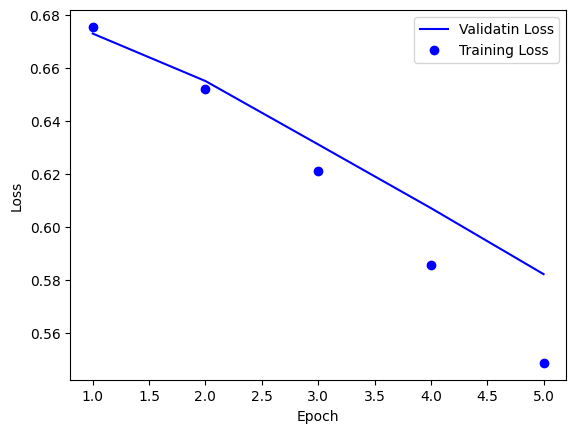

In [108]:
plt.plot(epoch,val_loss,'b', label="Validatin Loss")
plt.plot(epoch,training_loss,'bo',label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [109]:
val_accuracy=history_dict['val_accuracy']
train_accuracy=history_dict['accuracy']

In [111]:
train_accuracy

[0.0, 0.0, 0.0, 0.0, 0.0]